# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [7]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import json
from datetime import datetime

# Import API key
from api_keys import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy


# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [8]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

598

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [9]:
print("Beginning Data Retrieval")
print("-----------------------------")

city = "London"
url = "http://api.openweathermap.org/data/2.5/weather?"
record = 0
setnum = 1
output_df = []



for city in cities:
    record = record + 1
    print(f"Processing Record {record} of Set {setnum} | {city}")
    query_url = url + "appid=" + api_key + "&q=" + city
    try:
        weather_response = requests.get(query_url)
        weather_json = weather_response.json()
        cur_city = weather_json["name"]
        clouds = weather_json["clouds"]["all"]
        tempmax =weather_json["main"]["temp_max"]
        humid = weather_json["main"]["humidity"]
        date = weather_json["dt"]
        lat = weather_json["coord"]["lat"]
        lon = weather_json["coord"]["lon"]
        wind = weather_json["wind"]["speed"]
        country = weather_json["sys"]["country"]
        output_df.append({
            "City" : cur_city,
            "Cloudiness" : clouds,
            "Country" : country,
            "Date" : date,
            "Humidity" : humid,
            "Lat" : lat,
            "Lng" : lon,
            "Max Temp" : tempmax,
            "Wind Speed" : wind
        })
    except:
        print("City not found. Skipping...")
    if (record == 50):
        record = 0
        setnum = setnum+1

print("-----------------------------\n   Data Retrieval Complete   \n-----------------------------")

Beginning Data Retrieval
-----------------------------
Processing Record 1 of Set 1 | rikitea
Processing Record 2 of Set 1 | butaritari
Processing Record 3 of Set 1 | vaini
Processing Record 4 of Set 1 | tiksi
Processing Record 5 of Set 1 | luangwa
Processing Record 6 of Set 1 | chuy
Processing Record 7 of Set 1 | hovd
Processing Record 8 of Set 1 | mar del plata
Processing Record 9 of Set 1 | new norfolk
Processing Record 10 of Set 1 | kaitangata
Processing Record 11 of Set 1 | bambous virieux
Processing Record 12 of Set 1 | severo-kurilsk
Processing Record 13 of Set 1 | illoqqortoormiut
City not found. Skipping...
Processing Record 14 of Set 1 | cidreira
Processing Record 15 of Set 1 | blois
Processing Record 16 of Set 1 | nanortalik
Processing Record 17 of Set 1 | padang
Processing Record 18 of Set 1 | kathmandu
Processing Record 19 of Set 1 | ushuaia
Processing Record 20 of Set 1 | ballina
Processing Record 21 of Set 1 | souillac
Processing Record 22 of Set 1 | avarua
Processing Re

Processing Record 35 of Set 4 | kupang
Processing Record 36 of Set 4 | mbanza-ngungu
Processing Record 37 of Set 4 | chifeng
Processing Record 38 of Set 4 | oranjestad
Processing Record 39 of Set 4 | vila velha
Processing Record 40 of Set 4 | khatanga
Processing Record 41 of Set 4 | petropavlovsk-kamchatskiy
Processing Record 42 of Set 4 | ceres
Processing Record 43 of Set 4 | awjilah
Processing Record 44 of Set 4 | labuhan
Processing Record 45 of Set 4 | ormara
Processing Record 46 of Set 4 | bam
Processing Record 47 of Set 4 | preobrazheniye
Processing Record 48 of Set 4 | vanimo
Processing Record 49 of Set 4 | lebu
Processing Record 50 of Set 4 | seoul
Processing Record 1 of Set 5 | san quintin
Processing Record 2 of Set 5 | los llanos de aridane
Processing Record 3 of Set 5 | kirakira
Processing Record 4 of Set 5 | samusu
City not found. Skipping...
Processing Record 5 of Set 5 | torbay
Processing Record 6 of Set 5 | camacupa
Processing Record 7 of Set 5 | green river
Processing Re

Processing Record 24 of Set 8 | puerto baquerizo moreno
Processing Record 25 of Set 8 | amapa
Processing Record 26 of Set 8 | geraldton
Processing Record 27 of Set 8 | bobonong
City not found. Skipping...
Processing Record 28 of Set 8 | mount isa
Processing Record 29 of Set 8 | corn island
Processing Record 30 of Set 8 | santiago del estero
Processing Record 31 of Set 8 | aswan
Processing Record 32 of Set 8 | rawson
Processing Record 33 of Set 8 | singapore
Processing Record 34 of Set 8 | ketchikan
Processing Record 35 of Set 8 | sabya
Processing Record 36 of Set 8 | yeletskiy
City not found. Skipping...
Processing Record 37 of Set 8 | williamsburg
Processing Record 38 of Set 8 | bosaso
Processing Record 39 of Set 8 | galeana
Processing Record 40 of Set 8 | saint andrews
Processing Record 41 of Set 8 | beaverlodge
Processing Record 42 of Set 8 | togur
Processing Record 43 of Set 8 | rorvik
Processing Record 44 of Set 8 | amudat
Processing Record 45 of Set 8 | presidencia roque saenz pe

Processing Record 3 of Set 12 | viedma
Processing Record 4 of Set 12 | vestmannaeyjar
Processing Record 5 of Set 12 | yialos
City not found. Skipping...
Processing Record 6 of Set 12 | rawannawi
City not found. Skipping...
Processing Record 7 of Set 12 | portel
Processing Record 8 of Set 12 | saint-joseph
Processing Record 9 of Set 12 | saqqez
Processing Record 10 of Set 12 | motygino
Processing Record 11 of Set 12 | inyonga
Processing Record 12 of Set 12 | najran
Processing Record 13 of Set 12 | gonen
Processing Record 14 of Set 12 | husavik
Processing Record 15 of Set 12 | mogadishu
Processing Record 16 of Set 12 | portland
Processing Record 17 of Set 12 | thunder bay
Processing Record 18 of Set 12 | haines junction
Processing Record 19 of Set 12 | yangambi
Processing Record 20 of Set 12 | ambilobe
Processing Record 21 of Set 12 | inndyr
Processing Record 22 of Set 12 | alihe
Processing Record 23 of Set 12 | havre-saint-pierre
Processing Record 24 of Set 12 | korla
City not found. Sk

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [10]:
weather_out_df = pd.DataFrame(output_df)
weather_out_df.to_csv("output/city_data.csv")

weather_out_df.count()

City          537
Cloudiness    537
Country       537
Date          537
Humidity      537
Lat           537
Lng           537
Max Temp      537
Wind Speed    537
dtype: int64

In [11]:
weather_out_df.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,Rikitea,68,PF,1575590687,78,-23.12,-134.97,298.93,4.31
1,Butaritari,100,KI,1575590693,86,3.07,172.79,298.75,3.62
2,Vaini,11,IN,1575590689,89,15.34,74.49,291.49,4.07
3,Tiksi,100,RU,1575590693,100,71.64,128.87,247.82,1.52
4,Luangwa,85,MZ,1575590694,63,-15.62,30.40,298.33,5.56


### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

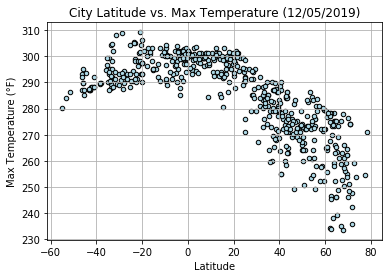

In [12]:
ax = weather_out_df.plot(kind='scatter', x='Lat', y='Max Temp', edgecolors="black", c="lightblue")

graph_date = weather_out_df["Date"].max()
dt = datetime.fromtimestamp(graph_date)
graph_datef = dt.strftime("%m/%d/%Y")
graph_datef

ax.grid()
ax.set_xlabel("Latitude")
ax.set_ylabel("Max Temperature (°F)")
ax.set_title(f"City Latitude vs. Max Temperature ({graph_datef})")

plt.savefig("output/MaxTmpvLat.png")

#### Latitude vs. Humidity Plot

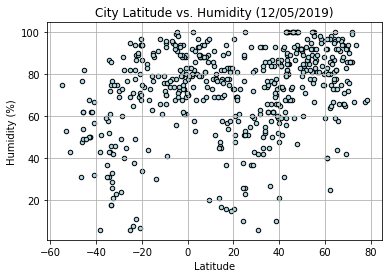

In [13]:
ax = weather_out_df.plot(kind='scatter', x='Lat', y='Humidity', edgecolors="black", c="lightblue")

ax.grid()
ax.set_xlabel("Latitude")
ax.set_ylabel("Humidity (%)")
ax.set_title(f"City Latitude vs. Humidity ({graph_datef})")

plt.savefig("output/MaxTmp.png")

#### Latitude vs. Cloudiness Plot

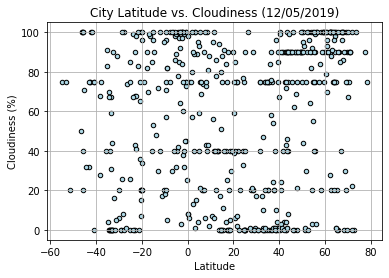

In [14]:
ax = weather_out_df.plot(kind='scatter', x='Lat', y='Cloudiness', edgecolors="black", c="lightblue")

ax.grid()
ax.set_xlabel("Latitude")
ax.set_ylabel("Cloudiness (%)")
ax.set_title(f"City Latitude vs. Cloudiness ({graph_datef})")

plt.savefig("output/CloudinessvLat.png")

#### Latitude vs. Wind Speed Plot

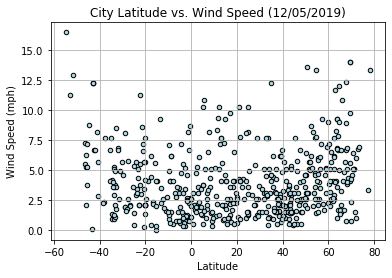

In [15]:
ax = weather_out_df.plot(kind='scatter', x='Lat', y='Wind Speed', edgecolors="black", c="lightblue")

ax.grid()
ax.set_xlabel("Latitude")
ax.set_ylabel("Wind Speed (mph)")
ax.set_title(f"City Latitude vs. Wind Speed ({graph_datef})")

plt.savefig("output/WindSpeedvLat.png")

In [19]:
weather_out_df['Date'].mean()


1575590717.055866

In [18]:
graph_date

1575590801

In [20]:
weather_out_df['Date'].mode()

0    1575590721
dtype: int64

In [21]:
weather_out_df['Date'].median()

1575590721.0

In [22]:
weather_out_df['Date'].min()

1575590197

In [ ]:
\